# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [95]:
#df_raw['prestige'].astype(int)
#df_raw['prestige'].round()

ValueError: Cannot convert NA to integer

## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [90]:
df_raw.describe()

# This shows that the admit=1 is generally at the 75%.and the mean is 588 for gre and the sd is 115(high comparitively). 
# The increase in value for 3 variables incereses the admission chances

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [7]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is a score of a test ranging between 0(theoritically) to 800. And gpa ia an average point calculated value based on the overall performance, so the range is 1 to 4

#### Question 4. Drop data points with missing data

In [8]:
df_raw.isnull().sum()
df_no_null=df_raw.dropna()             # drop a row if ANY values are missing
df_no_null.isnull().sum()
# assign values if missing
#t=df_raw.fillna(value='NA') 
#t=isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [114]:
df_no_null['prestige'].astype(int)
df_no_null['prestige'].round(0)

#df_prestige

0      3.0
1      3.0
2      1.0
3      4.0
4      4.0
5      2.0
6      1.0
7      2.0
8      3.0
9      2.0
10     4.0
11     1.0
12     1.0
13     2.0
14     1.0
15     3.0
16     4.0
17     3.0
18     2.0
19     1.0
20     3.0
21     2.0
22     4.0
23     4.0
24     2.0
25     1.0
26     1.0
27     4.0
28     2.0
29     1.0
      ... 
370    2.0
371    3.0
372    1.0
373    1.0
374    2.0
375    4.0
376    2.0
377    2.0
378    3.0
379    2.0
380    2.0
381    2.0
382    2.0
383    1.0
384    2.0
385    1.0
386    2.0
387    2.0
388    2.0
389    2.0
390    2.0
391    2.0
392    3.0
393    2.0
394    3.0
395    2.0
396    3.0
397    2.0
398    2.0
399    3.0
Name: prestige, dtype: float64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: When you run the command - df_no_null.isnull().sum(), you would see zero values in each of the variable as the null records have been removed. If we ran this command on old data set then we can see that the df_raw has how many null values

#### Question 6. Create box plots for GRE and GPA

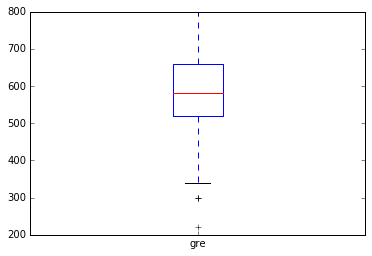

In [9]:
#boxplot 1
df_no_null["gre"].plot(kind="box")

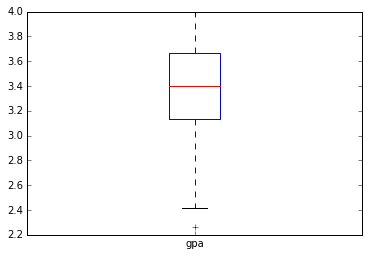

In [10]:
#boxplot 2 
df_no_null["gpa"].plot(kind="box")

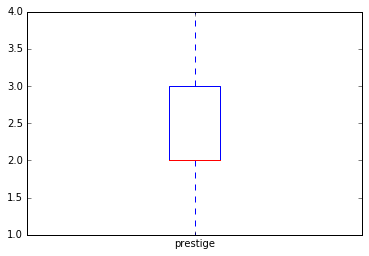

In [18]:
#boxplot 3
df_no_null["prestige"].plot(kind="box")

#### Question 7. What do this plots show?

Answer: It shows us how the data is distribution. For gre most of the data is between 500 and 650. for gpa the data evenly distributed between either side of the mean and nost of the data is concentrated between 3.1 and 3.7. And the lower bound and upper bounds for each variables

#### Question 8. Describe each distribution 

(array([   4.,   44.,  125.,  145.,   79.]),
 array([ 220.,  336.,  452.,  568.,  684.,  800.]),
 <a list of 5 Patch objects>)

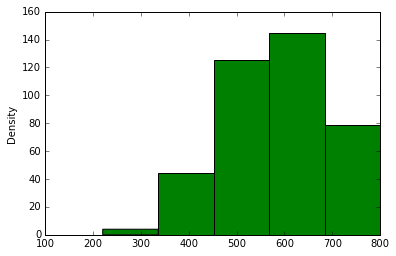

In [53]:
df_no_null["gre"].plot(kind="density", xlim=(100,800))
# Describe
#plt.hist(df_no_null["gre"], bins=5)


(array([   7.,   48.,   99.,  141.,  102.]),
 array([ 2.26 ,  2.608,  2.956,  3.304,  3.652,  4.   ]),
 <a list of 5 Patch objects>)

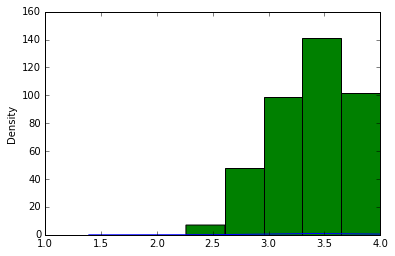

In [50]:
df_no_null["gpa"].plot(kind="density", xlim=(1,4))
# Describe
#The histogram show better representation as the values are discrete
#plt.hist(df_no_null["gpa"], bins=5)

(array([  61.,  148.,  121.,   67.]),
 array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ]),
 <a list of 4 Patch objects>)

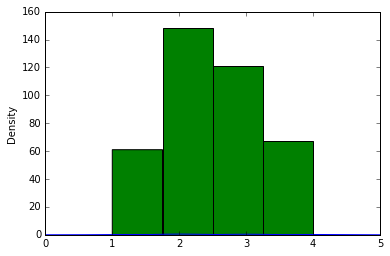

In [57]:
df_no_null["prestige"].plot(kind="density", xlim=(0,5))
plt.hist(df_no_null["prestige"], bins=4)
# Describe
# The histogram show better representation as the values are discrete

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. If we plot As-Is data then we cannot have a normal distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: yes. There are some outliers which need to be removed. Also if we randomly select the data from the dataframe then the distribution looks more normal.

means = []
#devs = []
samples = 100
for i in range(samples):
    t=np.random.random_integers(0,400)
    sample = df_no_null.gre[t]
    #print sample
    means.append(np.mean(sample))
    #devs.append(np.std(sample))
plt.hist(means, bins=20)
plt.title("Sample Means")
plt.show()

#print "Mean of Means:", np.mean(means)
#print "SD of Means:", np.std(means)


#### Question 11. Which of our variables are potentially colinear? 

In [123]:
# create a correlation matrix for the data
#np.random.random_integers(0,400)
#df_no_null.gre[np.random.random_integers(5)]

#sample=df_no_null.gre(100)

from statsmodels.formula.api import ols

prestige_dummies = pd.get_dummies(df_no_null.prestige, prefix='prestige').iloc[:, 1:]
#prestige_dummies
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([df_no_null, prestige_dummies], axis=1)
data.head()
data = data.rename(columns={'prestige_2.0': 'prestige_2', 'prestige_3.0': 'prestige_3','prestige_4.0': 'prestige_4'})
data
oadmit = ols('admit ~ gre + gpa + prestige_2 + prestige_3 + prestige_4', data).fit()
print(oadmit.summary())  
#describe


                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Sun, 27 Nov 2016   Prob (F-statistic):           9.71e-08
Time:                        08:24:20   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2377      0.217     -1.095      0.2

#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

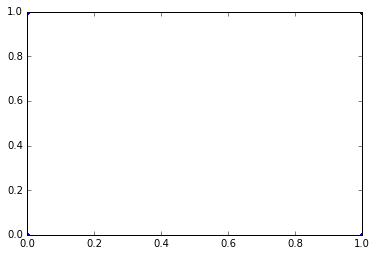

In [160]:
#data
plt.plot(data.admit, data.prestige_2, '.')

#### Question 14. What is your hypothesis? 

Answer: 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

The missing data can be populated either a mean value or median. Or a random integer.

In [125]:
data.head(5)

,admit,gre,gpa,prestige,prestige_val,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,3.0,3.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,3.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,4.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,4.0,0.0,0.0,1.0


#### 2. Bonus: Log transform the skewed data

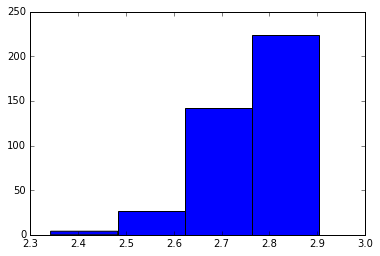

In [150]:
log_columns = ['admit', 'gre','gpa','prestige_2','prestige_3','prestige_4']  # any others?
log_data = data.copy()
log_data[log_columns] = log_data[log_columns].apply(np.log10)
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
#plt.plot(data.gre, data.admit, '.')
plt.hist(log_data["gre"], bins=4)
# show the plot
plt.show()

#### 3. Advanced: Impute missing data